In [143]:
# https://preshing.com/20110831/penrose-tiling-explained/ 参照
import math
import cmath # 複素数
goldenRatio = (1 + math.sqrt(5)) / 2
# triangles は、(色,３頂点の複素数座標)のリスト
def subdivide(triangles):
    result = []
    for color, A, B, C in triangles:
        if color == 0: # 片方の色 = 赤のときの分割
            # Subdivide red triangle
            P = A + (B - A) / goldenRatio # 長辺の一つをPで分割。Pは底辺に近いところ
            result += [(0, C, P, B), (1, P, C, A)]
        else: # もう片方の色= 青のときの分割
            # Subdivide blue triangle
            Q = B + (A - B) / goldenRatio # 短辺の一本を分割。鈍角頂点に近いところにQ
            R = B + (C - B) / goldenRatio # 長辺を分割
            result += [(1, R, C, A), (1, Q, R, B), (0, R, Q, A)]
            #result += [(1,R,C,A),(1,Q,B,R),(0,R,A,Q)]
    return result

In [144]:
# Create wheel of red triangles around the origin
# 原点 0 + 0j を頂点Aとし、円周上に10頂点を取る。すべて鋭角三角形
triangles = []
for i in range(10):
    B = cmath.rect(1, (2*i - 1) * math.pi / 10)
    C = cmath.rect(1, (2*i + 1) * math.pi / 10)
    if i % 2 == 0:
        B, C = C, B  # Make sure to mirror every second triangle、三角形の向きは大事
    triangles.append((0, 0j, B, C))

In [145]:
def draw_penrose_tile(triangles,trsx=300,trsy=300,scx=100,scy=100):
    # お絵描き面を作る
    surface=cairo.ImageSurface(cairo.FORMAT_ARGB32, 640, 480)
    # お絵描き面surfaceに各種情報を書き込むオブジェクトがcr
    cr = cairo.Context(surface)
    # Draw red triangles
    # 面の座標指定と、三角形の座標が合わないので
    # 平行移動と拡大とを行う
    cr.translate(trsx,trsy)
    cr.scale(scx,scy)

    # 赤三角を描く。A頂点座標を２次元実数ペアで指定し
    # 頂点Bまで線を引き
    # さらにBからCまで行って
    # 始点で閉じる
    for color, A, B, C in triangles:
        if color == 0:
            cr.move_to(A.real, A.imag)
            cr.line_to(B.real, B.imag)
            cr.line_to(C.real, C.imag)
            cr.close_path()
    cr.set_source_rgb(1.0, 0.35, 0.35) # 色指定
    cr.fill()   

    # Draw blue triangles
    for color, A, B, C in triangles:
        if color == 1:
            cr.move_to(A.real, A.imag)
            cr.line_to(B.real, B.imag)
            cr.line_to(C.real, C.imag)
            cr.close_path()
    cr.set_source_rgb(0.4, 0.4, 1.0)
    cr.fill()

    # Determine line width from size of first triangle
    color, A, B, C = triangles[0]
    cr.set_line_width(abs(B - A) / 10.0)
    cr.set_line_join(cairo.LINE_JOIN_ROUND)

    # Draw outlines
    for color, A, B, C in triangles:
        cr.move_to(C.real, C.imag)
        cr.line_to(A.real, A.imag)
        cr.line_to(B.real, B.imag)
    cr.set_source_rgb(0.2, 0.2, 0.2)
    cr.stroke()

    display(surface_to_image(surface)) #  借用した関数：surcafeオブジェクトをpngにして、inlineに表示する

In [146]:
# https://qiita.com/maueki/items/76441d1dfa2b5cd6d18a 
# 参照サイト
def surface_to_image(surface):
    buf = io.BytesIO()
    surface.write_to_png(buf)
    data = buf.getvalue()
    buf.close()
    return Image(data=data)

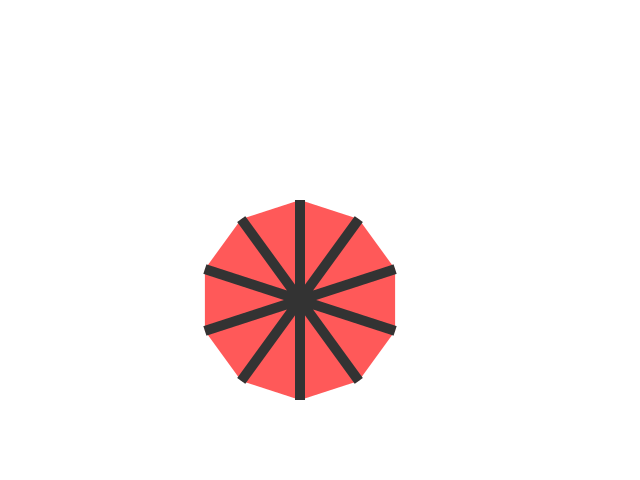

In [147]:
draw_penrose_tile(triangles)

In [148]:
niter = 1
triangles_div = triangles
for i in range(niter):
    triangles_div = subdivide(triangles_div)

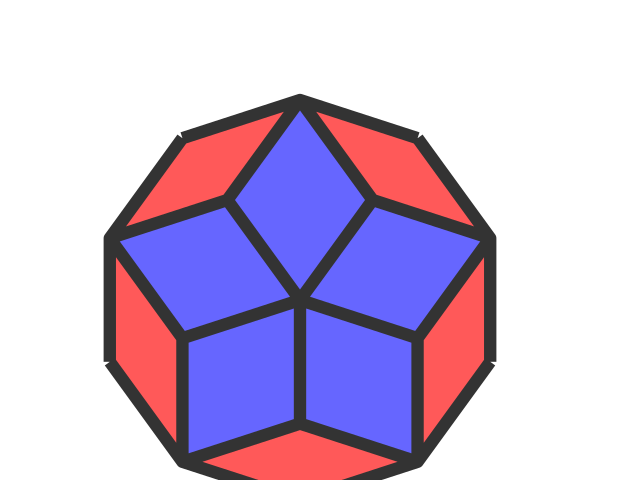

In [149]:
draw_penrose_tile(triangles_div,scx=200,scy=200)

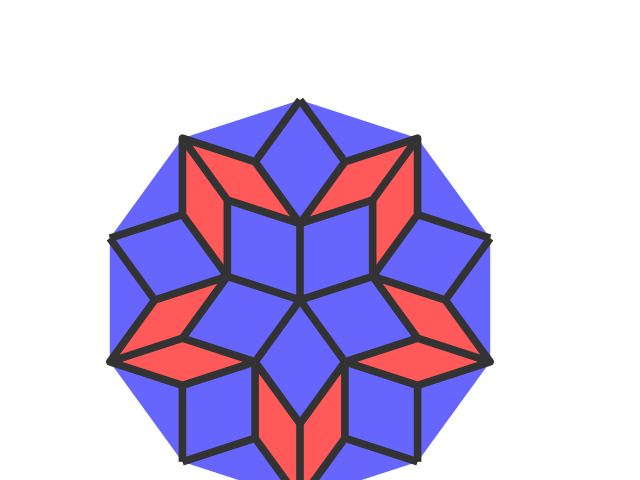

In [150]:
niter = 2
triangles_div = triangles
for i in range(niter):
    triangles_div = subdivide(triangles_div)
draw_penrose_tile(triangles_div,scx=200,scy=200)

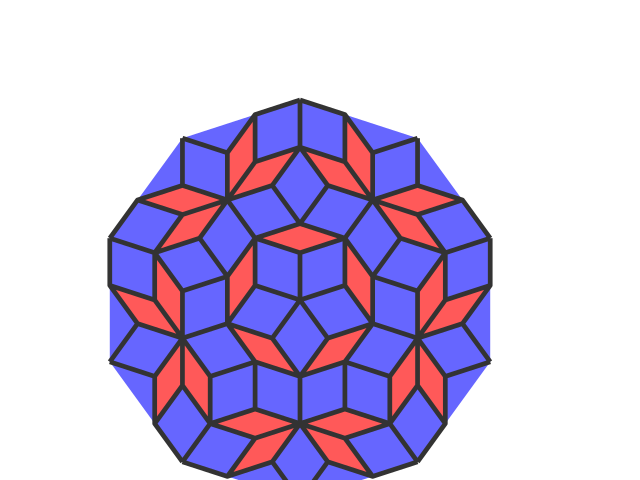

In [151]:
niter = 3
triangles_div = triangles
for i in range(niter):
    triangles_div = subdivide(triangles_div)
draw_penrose_tile(triangles_div,scx=200,scy=200)

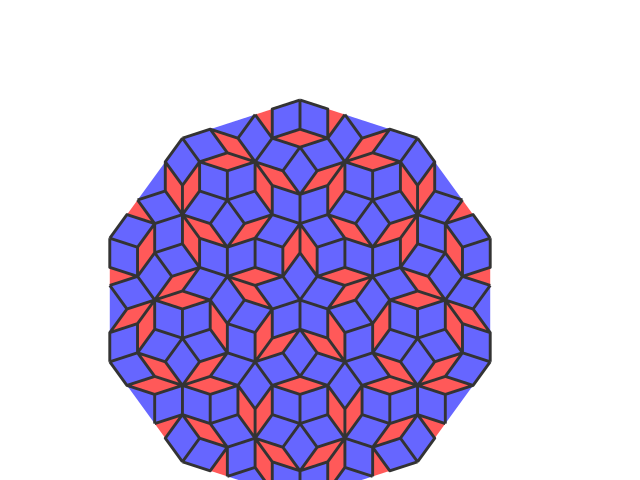

In [152]:
niter = 4
triangles_div = triangles
for i in range(niter):
    triangles_div = subdivide(triangles_div)
draw_penrose_tile(triangles_div,scx=200,scy=200)

In [153]:
# 分割パターンが違う
def subdivide2(triangles):
    result = []
    for color, A, B, C in triangles:
        if color == 0:
            # Subdivide red (sharp isosceles) (half kite) triangle
            Q = A + (B - A) / goldenRatio
            R = B + (C - B) / goldenRatio
            result += [(1, R, Q, B), (0, Q, A, R), (0, C, A, R)]
        else:
        # Subdivide blue (fat isosceles) (half dart) triangle
            P = C + (A - C) / goldenRatio
            result += [(1, B, P, A), (0, P, C, B)]
    return result

In [154]:
# Create wheel of red triangles around the origin
# kiteが５個並ぶ
triangles = []
for i in range(10):
    B = cmath.rect(1, (2*i - 1) * math.pi / 10)
    C = cmath.rect(1, (2*i + 1) * math.pi / 10)
    if i % 2 == 0:
        B, C = C, B # Make sure to mirror every second triangle
    # triangles.append((0, 0j, B, C)) # 第一例の場合
    triangles.append((0, B, 0j, C)) 

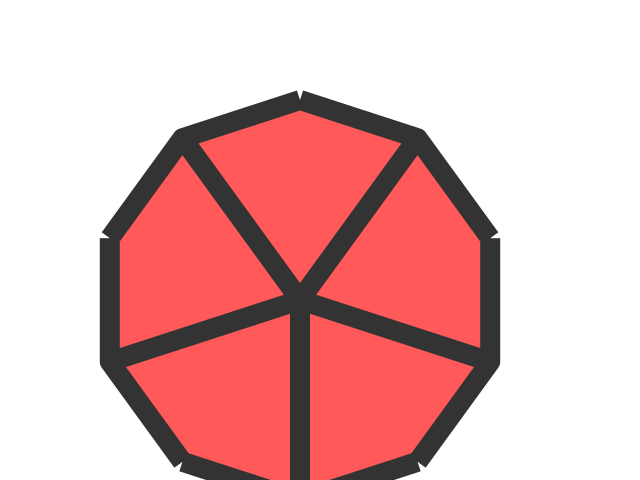

In [155]:
draw_penrose_tile(triangles,scx=200,scy=200)

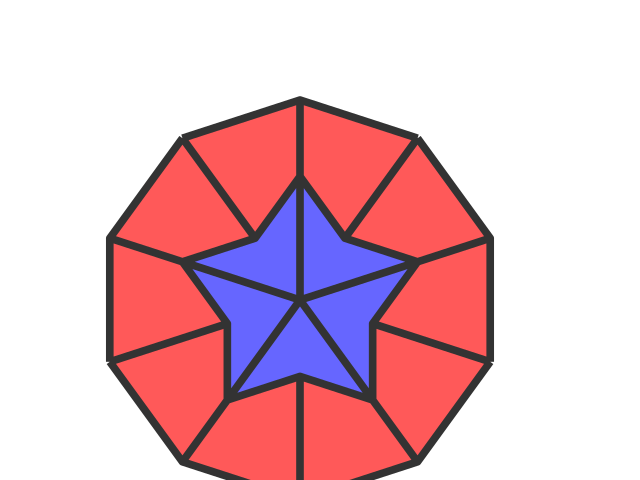

In [136]:
niter = 1
triangles_div2 = triangles
for i in range(niter):
    triangles_div2 = subdivide2(triangles_div2)
draw_penrose_tile(triangles_div2,scx=200,scy=200)

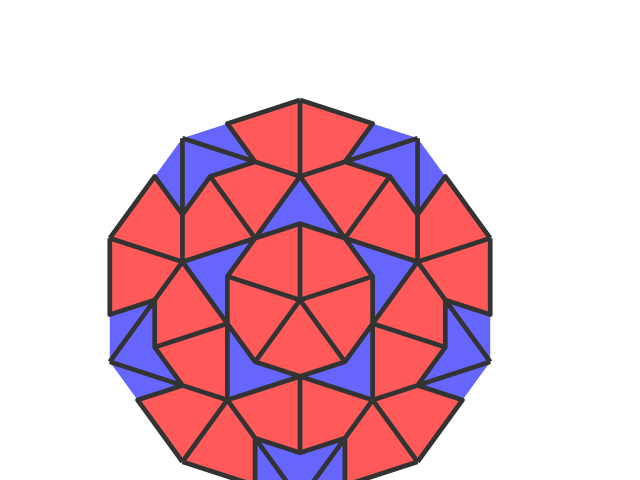

In [137]:
niter = 2
triangles_div2 = triangles
for i in range(niter):
    triangles_div2 = subdivide2(triangles_div2)
draw_penrose_tile(triangles_div2,scx=200,scy=200)

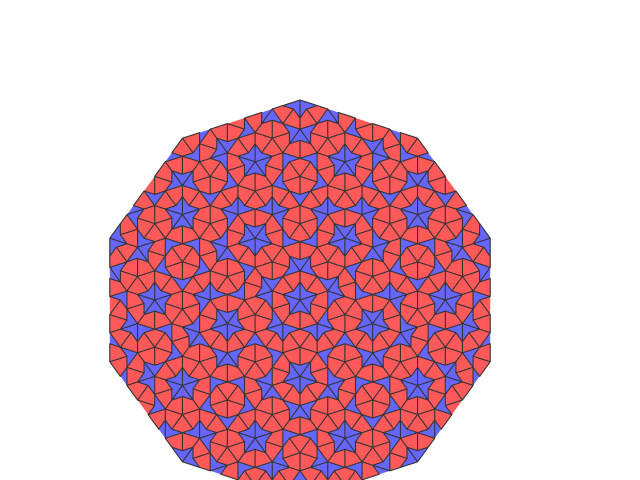

In [139]:
niter = 5
triangles_div2 = triangles
for i in range(niter):
    triangles_div2 = subdivide2(triangles_div2)
draw_penrose_tile(triangles_div2,scx=200,scy=200)